- compare-model-accuracy
    - x축
        - 곱셈 추천 방법?
    - y축
        - accuracy

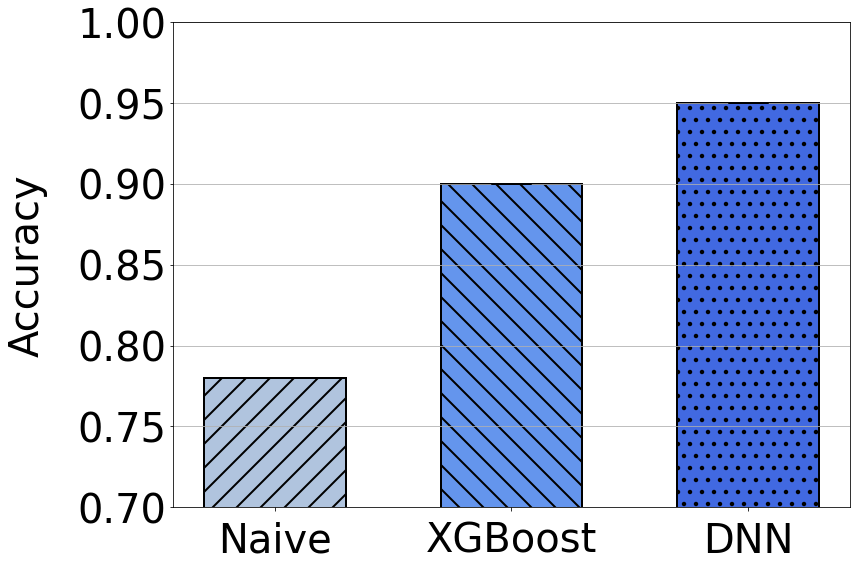

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Naive accuracy 성능
Naive_accuracy = [0.78]
Naive_accuracy_min = [0.78]
Naive_accuracy_max = [0.78]
df = pd.DataFrame({'x_label':"Naive",'Naive_accuracy':Naive_accuracy, 'Naive_accuracy_min': Naive_accuracy_min, 'Naive_accuracy_max': Naive_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.Naive_accuracy - df.Naive_accuracy_min
df['maxgap'] = df.Naive_accuracy_max - df.Naive_accuracy
Naive_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# XGBoost accuracy 성능
XGBoost_accuracy = [0.90]
XGBoost_accuracy_min = [0.90]
XGBoost_accuracy_max = [0.90]
df = pd.DataFrame({'x_label':"XGBoost",'XGBoost_accuracy':XGBoost_accuracy, 'XGBoost_accuracy_min': XGBoost_accuracy_min, 'XGBoost_accuracy_max': XGBoost_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.XGBoost_accuracy - df.XGBoost_accuracy_min
df['maxgap'] = df.XGBoost_accuracy_max - df.XGBoost_accuracy
XGBoost_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# DNN accuracy 성능
DNN_accuracy = [0.95]
DNN_accuracy_min = [0.95]
DNN_accuracy_max = [0.95]
df = pd.DataFrame({'x_label':"DNN",'DNN_accuracy':DNN_accuracy, 'DNN_accuracy_min': DNN_accuracy_min, 'DNN_accuracy_max': DNN_accuracy_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.DNN_accuracy - df.DNN_accuracy_min
df['maxgap'] = df.DNN_accuracy_max - df.DNN_accuracy
DNN_yerr = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 40

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.45)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

#x = np.array([0, 1, 2]) # x축 인덱스
width = 0.6 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(0, Naive_accuracy, width, linewidth=2, edgecolor='black', yerr=Naive_yerr, hatch='/', color='lightsteelblue', capsize=20)
bar2 = ax1.bar(1, XGBoost_accuracy, width, linewidth=2, edgecolor='black', yerr=XGBoost_yerr, hatch='\\', color='cornflowerblue', capsize=20)
bar3 = ax1.bar(2, DNN_accuracy, width, linewidth=2, edgecolor='black', yerr=DNN_yerr, hatch='.', color='royalblue', capsize=20)
################################# ax1 ####################################################

ax1.set_xticks([0, 1, 2]) # x축 tick 위치
ax1.set_xticklabels(["Naive", "XGBoost", "DNN"]) # x축 tick label
ax1.tick_params(axis='x',pad=10) # x축 tick label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0.7, 1])  # 좌측 y축 범위 설정
ax1.set_yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]) # y축 index 설정

#ax1.set_xlabel('Model', labelpad=20) # ax1 xlabel 설정
ax1.set_ylabel('Accuracy', labelpad=30) # ax1 ylabel 설정

#ax1.legend(loc="upper right") # 범례 표시

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./compare-model-accuracy.png')
plt.show()